In [6]:
import warnings
warnings.filterwarnings("ignore")

# Data

In [11]:
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO

import pandas as pd

# Training dataset as a string variable
training_data_csv = '''Headline Length (in words),Article Length (in words),Number of Images,Publication Day,Popularity (in views),Popularity (Class)
4,250,1,Wednesday,10,Unpopular
9,700,2,Monday,15,Unpopular
11,950,3,Friday,20,Popular
14,800,2,Tuesday,25,Popular
6,300,1,Thursday,12,Unpopular
12,600,2,Wednesday,18,Unpopular
10,500,1,Monday,14,Unpopular
13,750,3,Friday,22,Popular
15,900,2,Tuesday,28,Popular
7,350,1,Thursday,13,Unpopular
8,450,2,Sunday,16,Unpopular
16,1100,4,Tuesday,32,Popular
10,550,1,Friday,15,Unpopular
12,850,2,Thursday,24,Popular
'''

# Test dataset as a string variable
test_data_csv = '''Headline Length (in words),Article Length (in words),Number of Images,Publication Day,Popularity (in views),Popularity (Class)
5,400,1,Sunday,11,Unpopular
10,900,3,Wednesday,19,Popular
13,700,2,Monday,21,Unpopular
11,500,1,Friday,17,Popular
'''

# Load training data into a pandas dataframe
training_df = pd.read_csv(StringIO(training_data_csv))

# Load test data into a pandas dataframe
test_df = pd.read_csv(StringIO(test_data_csv))


In [24]:
training_df["Popularity (Class)"] = training_df["Popularity (in views)"].apply(lambda x: 1 if x > training_df["Popularity (in views)"].median() else 0)
training_df

,Headline Length (in words),Article Length (in words),Number of Images,Publication Day,Popularity (in views),Popularity (Class)
0,4,250,1,Wednesday,10,0
1,9,700,2,Monday,15,0
2,11,950,3,Friday,20,1
3,14,800,2,Tuesday,25,1
4,6,300,1,Thursday,12,0
5,12,600,2,Wednesday,18,1
6,10,500,1,Monday,14,0
7,13,750,3,Friday,22,1
8,15,900,2,Tuesday,28,1
9,7,350,1,Thursday,13,0


# Plots

### Scatter plot

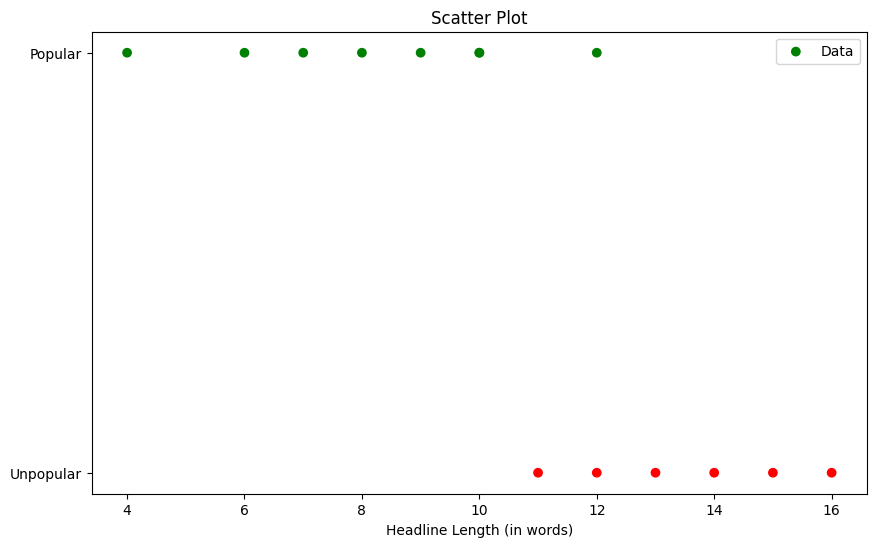

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Label encoding for the target variable
le = LabelEncoder()
training_df['Popularity (Class)'] = le.fit_transform(training_df['Popularity (Class)'])

# Define features and target
X_train = training_df[['Headline Length (in words)']]
y_train = training_df['Popularity (Class)']

# Create a new figure
plt.figure(figsize=(10, 6))

# Scatter plot of the data points with color based on class
colors = ['green' if label == 1 else 'red' for label in y_train]
plt.scatter(X_train, y_train, c=colors, label='Data')

# Label axes and title
plt.xlabel('Headline Length (in words)')
plt.yticks([0, 1], ['Unpopular', 'Popular'])
plt.title('Scatter Plot')

# Display the legend
plt.legend()

# Show the plot
plt.show()


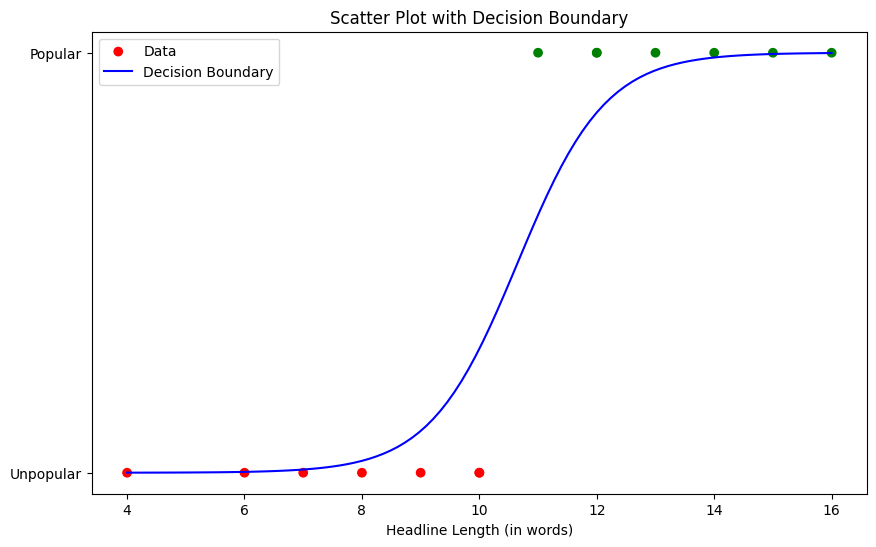

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Label encoding for the target variable
le = LabelEncoder()
training_df['Popularity (Class)'] = le.fit_transform(training_df['Popularity (Class)'])

# Define features and target
X_train = training_df[['Headline Length (in words)']]
y_train = training_df['Popularity (Class)']

# Initialize a Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# The coefficients
b0 = logistic_model.intercept_[0]
b1 = logistic_model.coef_[0][0]

# Calculate the logistic function output for the range of x values
x_values = np.linspace(X_train.min(), X_train.max(), 100)
y_values = 1 / (1 + np.exp(-(b0 + b1 * x_values)))

# Create a new figure
plt.figure(figsize=(10, 6))

# Scatter plot of the data points with color based on class
colors = ['green' if label == 1 else 'red' for label in y_train]
plt.scatter(X_train, y_train, c=colors, label='Data')

# Plot the decision boundary
plt.plot(x_values, y_values, color='blue', label='Decision Boundary')

# Label axes and title
plt.xlabel('Headline Length (in words)')
plt.yticks([0, 1], ['Unpopular', 'Popular'])
plt.title('Scatter Plot with Decision Boundary')

# Display the legend
plt.legend()

# Show the plot
plt.show()


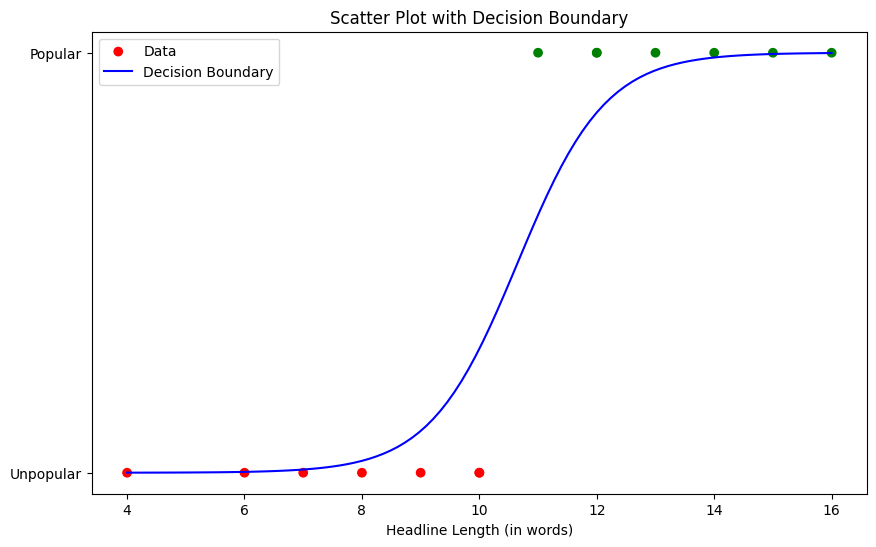

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Label encoding for the target variable
le = LabelEncoder()
training_df['Popularity (Class)'] = le.fit_transform(training_df['Popularity (Class)'])

# Define features and target
X_train = training_df[['Headline Length (in words)']]
y_train = training_df['Popularity (Class)']

# Initialize a Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# The coefficients
b0 = logistic_model.intercept_[0]
b1 = logistic_model.coef_[0][0]

# Calculate the logistic function output for the range of x values
x_values = np.linspace(X_train.min(), X_train.max(), 100)
y_values = 1 / (1 + np.exp(-(b0 + b1 * x_values)))

# Create a new figure
plt.figure(figsize=(10, 6))

# Scatter plot of the data points with color based on class
colors = ['green' if label == 1 else 'red' for label in y_train]
plt.scatter(X_train, y_train, c=colors, label='Data')

# Plot the decision boundary
plt.plot(x_values, y_values, color='blue', label='Decision Boundary')

# Label axes and title
plt.xlabel('Headline Length (in words)')
plt.yticks([0, 1], ['Unpopular', 'Popular'])
plt.title('Scatter Plot with Decision Boundary')

# Display the legend
plt.legend()

# Show the plot
plt.show()


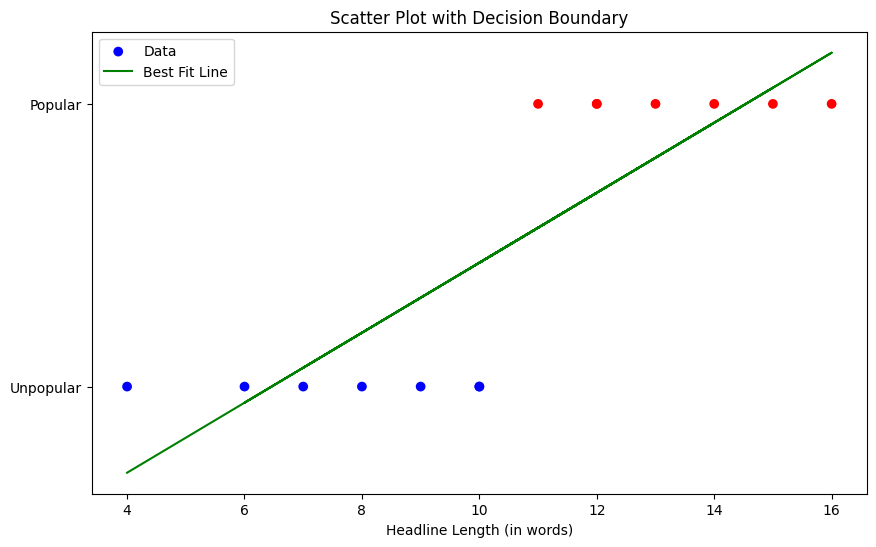

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Data
x = training_df['Headline Length (in words)']
y = training_df['Popularity (Class)']

# Create the design matrix
X = np.vstack((np.ones_like(x), x)).T

# Calculate optimal b0 and b1 using the normal equation
optimal_params = np.linalg.inv(X.T @ X) @ X.T @ y
b0_optimal, b1_optimal = optimal_params[0], optimal_params[1]

# Create a new figure
plt.figure(figsize=(10, 6))

# Scatter plot of the data points with color based on class
colors = ['red' if label == 1 else 'blue' for label in y_train]
plt.scatter(x, y, c=colors, label='Data')

# Plot the decision boundary
plt.plot(x, b0_optimal + b1_optimal * x, color='green', label='Best Fit Line')

# Label axes and title
plt.xlabel('Headline Length (in words)')
plt.yticks([0, 1], ['Unpopular', 'Popular'])
plt.title('Scatter Plot with Decision Boundary')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [19]:
b0,b1

(-14.207196756274818, 1.3336776358964473)

In [7]:
import sys
from io import StringIO
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from ipywidgets import interact, fixed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Same training and test data

# Load training data into a pandas dataframe
training_df = pd.read_csv(StringIO(training_data_csv))

# Load test data into a pandas dataframe
test_df = pd.read_csv(StringIO(test_data_csv))

# Label encoding for the target variable
le = LabelEncoder()
training_df['Popularity (Class)'] = le.fit_transform(training_df['Popularity (Class)'])
test_df['Popularity (Class)'] = le.transform(test_df['Popularity (Class)'])

# Data
x = training_df[['Headline Length (in words)']]
y = training_df['Popularity (Class)']

# Loss function
def calculate_loss(b0, b1):
    # Define logistic regression model
    lr = LogisticRegression()
    lr.intercept_ = np.array([b0])
    lr.coef_ = np.array([[b1]])
    
    # Set classes manually
    lr.classes_ = np.array([0, 1])
    
    # Calculate probabilities for each class
    probabilities = lr.predict_proba(x)
    
    # Calculate log loss
    log_loss = -np.mean(y * np.log(probabilities[:, 1]) + (1 - y) * np.log(probabilities[:, 0]))
    
    return log_loss

# Define parameter range
b0_range = np.linspace(-10, 10, 100)
b1_range = np.linspace(-10, 10, 100)

# Calculate loss for each combination of b0 and b1
losses = np.empty((len(b0_range), len(b1_range)))
for i, b0 in enumerate(b0_range):
    for j, b1 in enumerate(b1_range):
        losses[i, j] = calculate_loss(b0, b1)

# Create meshgrid for 3D plot
B0, B1 = np.meshgrid(b0_range, b1_range)

# Create surface plot
def plot_surface(ax, b0, b1):
    ax.plot_surface(B0, B1, losses, cmap='viridis', rstride=1, cstride=1, alpha=0.6, linewidth=0, antialiased=False)
    ax.scatter(b0, b1, calculate_loss(b0, b1), color='red', s=100, label='Selected Point', alpha=1, edgecolor='black', zorder=5)
    ax.set_xlabel('b0')
    ax.set_ylabel('b1')
    ax.set_zlabel('Loss')
    ax.set_title('Loss Function Surface')
    ax.legend()

# Update and draw plots
def update_plot(b0, b1):
    # Create figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # Create scatter plot and regression line
    ax1.scatter(x, y, color='blue', label='Data')
    probas = 1 / (1 + np.exp(-(b0 + b1 * x)))
    ax1.plot(x, probas, color='red', label='Decision Boundary')
    ax1.set_xlabel('Headline Length (in words)')
    ax1.set_ylabel('Popularity (Class)')
    ax1.set_title('Scatter Plot with Decision Boundary')
    ax1.legend()

    # Create surface plot
    ax2 = fig.add_subplot(122, projection='3d')
    plot_surface(ax2, b0, b1)

    # Draw the plots
    plt.show()

# Display sliders and initial plots
interact(
    update_plot,
    b0=(b0_range.min(),b0_range.max()),
    b1=(b1_range.min(),b1_range.max())
)


interactive(children=(FloatSlider(value=0.0, description='b0', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

<function __main__.update_plot(b0, b1)>

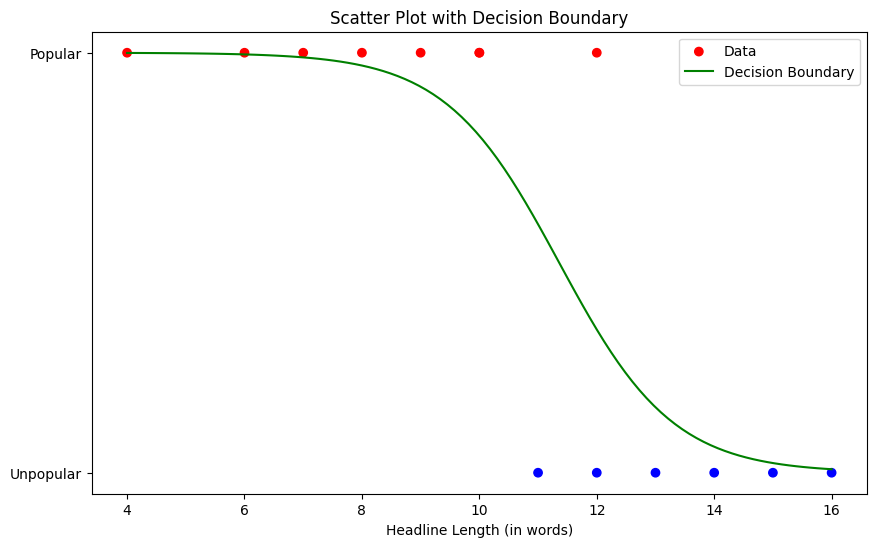

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Label encoding for the target variable
le = LabelEncoder()
training_df['Popularity (Class)'] = le.fit_transform(training_df['Popularity (Class)'])

# Define features and target
X_train = training_df[['Headline Length (in words)']]
y_train = training_df['Popularity (Class)']

# Initialize a Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# The coefficients
b0 = logistic_model.intercept_[0]
b1 = logistic_model.coef_[0][0]

# Calculate the logistic function output for the range of x values
x_values = np.linspace(X_train.min(), X_train.max(), 100)
y_values = 1 / (1 + np.exp(-(b0 + b1 * x_values)))

# Create a new figure
plt.figure(figsize=(10, 6))

# Scatter plot of the data points with color based on class
colors = ['red' if label == 1 else 'blue' for label in y_train]
plt.scatter(X_train, y_train, c=colors, label='Data')

# Plot the decision boundary
plt.plot(x_values, y_values, color='green', label='Decision Boundary')

# Label axes and title
plt.xlabel('Headline Length (in words)')
plt.yticks([0, 1], ['Unpopular', 'Popular'])
plt.title('Scatter Plot with Decision Boundary')

# Display the legend
plt.legend()

# Show the plot
plt.show()
